In [ ]:
# import libraries
import os
import re
import cv2 # opencv library
import numpy as np
from os.path import isfile, join
import matplotlib.pyplot as plt

In [ ]:
# Read image from file
temp_img = cv2.imread("/content/drive/MyDrive/DSC Competition/nus-sds-dsc2021/train_data/train_images/1001.jpg")

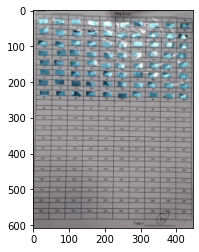

In [ ]:
# image in default BGR color
plt.imshow(temp_img)

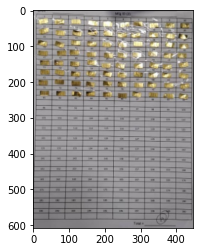

In [ ]:
# Change from default BGR to RGB
temp_image_RGB = cv2.cvtColor(temp_img, cv2.COLOR_BGR2RGB)
plt.imshow(temp_image_RGB)

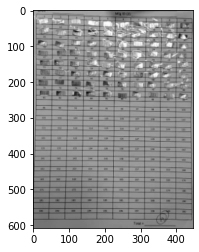

In [ ]:
# Make image gray scaled
temp_image_GRAY = cv2.cvtColor(temp_img, cv2.COLOR_BGR2GRAY)
plt.imshow(temp_image_GRAY, cmap="gray")

608 446 3


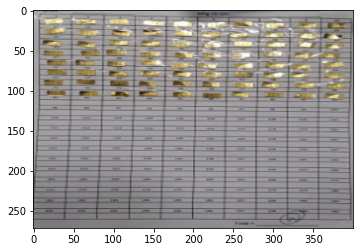

In [ ]:
# Resizing
x, y, z = temp_img.shape
print(x, y, z)
ratio = x/y
temp_resized = cv2.resize(temp_image_RGB, (400,int(200*ratio)))
plt.imshow(temp_resized)

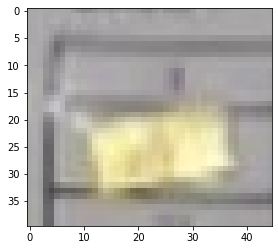

In [ ]:
# Cropping acumen
temp_cropped = temp_image_RGB[5:45, 5:50]
plt.imshow(temp_cropped)

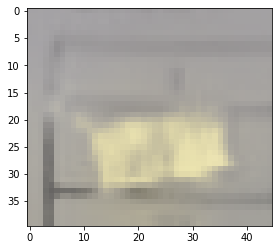

In [ ]:
# Used bilateral filter to remove noise and keep edges sharp
temp_cropped_bf = cv2.bilateralFilter(temp_cropped, 35, 75, 75)
plt.imshow(temp_cropped_bf)

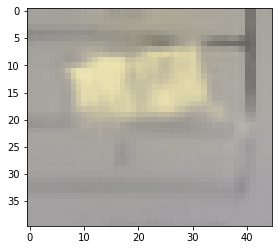

In [ ]:
# Flipping of image horizontally
temp_cropped_bf_hf = cv2.flip(temp_cropped_bf, 1)

# Flipping of image vertically
temp_cropped_bf_f = cv2.flip(temp_cropped_bf_hf, 0)
plt.imshow(temp_cropped_bf_f)

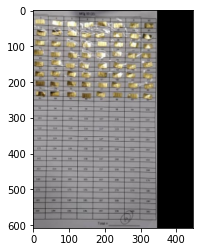

In [ ]:
# translate img

def translate(img, x, y):
    transMat = np.float32([[1,0,x], [0,1,y]])
    dimensions = (img.shape[1], img.shape[0])
    return cv2.warpAffine(img, transMat, dimensions)

temp_left = translate(temp_image_RGB, -100, 0)
plt.imshow(temp_left)

# Positive x --> translation in positive x direction (image moves right)
# Negative x --> translation in negative x direction (image moves left)
# Positive y --> translation in negative y direction (image moves down)
# Negative y --> translation in positive y direction (image moves up)

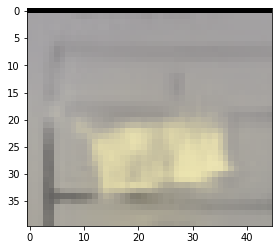

In [ ]:
# rotate img

def rotate(img, angle, rotPoint=None):
    height = img.shape[0]
    width = img.shape[1]
    dimensions = (width, height)
    
    if rotPoint is None:
        rotPoint = (width//2, height//2) #centrepoint
    
    rotMat = cv2.getRotationMatrix2D(rotPoint, -angle, 1.0)
    return cv2.warpAffine(img, rotMat, dimensions)

temp_cropped_bf_f_rotated = rotate(temp_cropped_bf_f, 180)
plt.imshow(temp_cropped_bf_f_rotated)

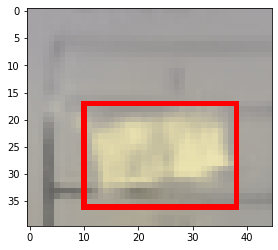

In [ ]:
# draw on img

copy = temp_cropped_bf.copy()
cv2.rectangle(copy, (10,17), (38,36), (255,0,0), 1)
plt.imshow(copy)

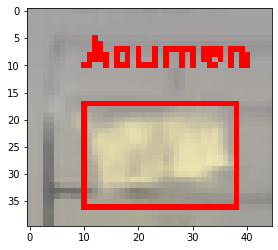

In [ ]:
# label image

cv2.putText(copy, "Acumen", (10,10), cv2.FONT_HERSHEY_DUPLEX, 0.24, (255,0,0),1)
plt.imshow(copy)

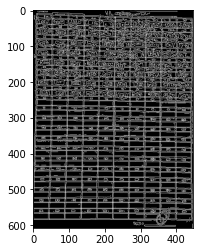

In [ ]:
# edge detection
temp_ed = cv2.Canny(temp_image_GRAY, 20, 30)
plt.imshow(temp_ed, cmap='gray')

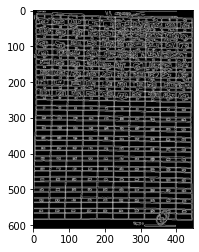

In [ ]:
# bilateral filter + edge detection
tmp = cv2.bilateralFilter(temp_image_RGB, 35, 20, 10)
# plt.imshow(tmp)
tmp = cv2.cvtColor(tmp, cv2.COLOR_RGB2GRAY)
# plt.imshow(tmp, cmap="gray")
tmp = cv2.Canny(tmp, 20,30)
plt.imshow(tmp, cmap="gray")

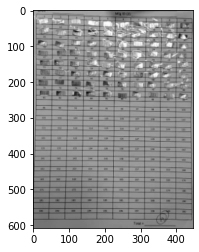

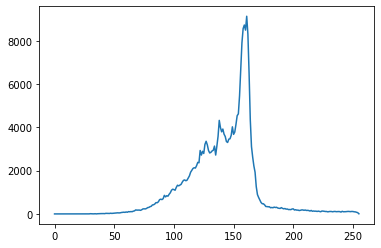

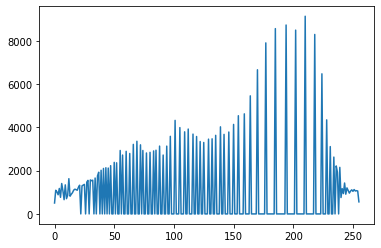

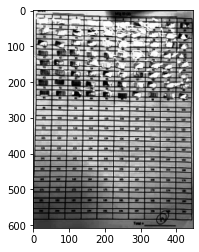

In [ ]:
# Histogram computation and equalisation
plt.imshow(temp_image_RGB)
tempInGray = cv2.cvtColor(temp_image_RGB, cv2.COLOR_RGB2GRAY)
plt.imshow(tempInGray, cmap="gray")

# Calculate distribution of pixel intensity
hist = cv2.calcHist([tempInGray], [0], None, [256], [0,256])
plt.figure()
plt.plot(hist)
plt.show()

# equalize histogram
equalized = cv2.equalizeHist(tempInGray)

# cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])
equalized_hist = cv2.calcHist([equalized], [0], None, [256], [0,256])
plt.figure()
plt.plot(equalized_hist)
plt.show()

plt.imshow(equalized, cmap="gray")



*   channels : it is also given in square brackets. It the index of channel for which we calculate histogram. For example, if input is grayscale image, its value is [0]. For color image, you can pass [0],[1] or [2] to calculate histogram of blue,green or red channel respectively.
*   mask : mask image. To find histogram of full image, it is given as “None”. But if you want to find histogram of particular region of image, you have to create a mask image for that and give it as mask. (I will show an example later.)


*   histSize : this represents our BIN count. Need to be given in square brackets. For full scale, we pass [256].
*   ranges : this is our RANGE. Normally, it is [0,256].







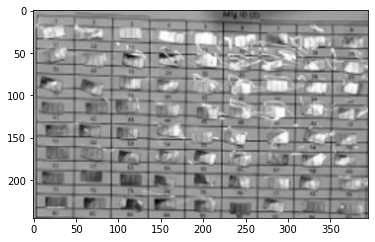

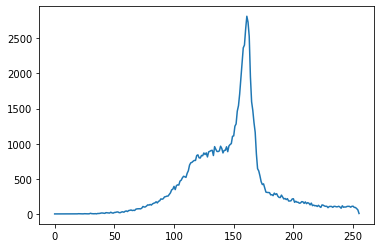

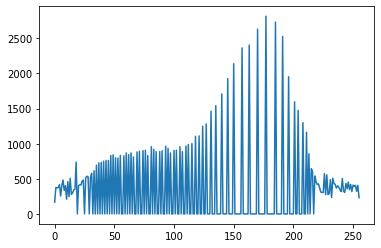

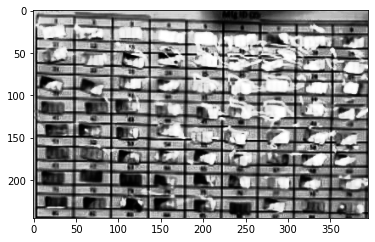

In [ ]:
# Cropping acumen
cropped = temp_image_RGB[5:250, 5:400]
plt.imshow(cropped)

# Histogram computation and equalisation
croppedInGray = cv2.cvtColor(cropped, cv2.COLOR_RGB2GRAY)
plt.imshow(croppedInGray, cmap="gray")

# Calculate distribution of pixel intensity
hist = cv2.calcHist([croppedInGray], [0], None, [256], [0,256])
plt.figure()
plt.plot(hist)
plt.show()

# equalize histogram
equalized = cv2.equalizeHist(croppedInGray)

# cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])
equalized_hist = cv2.calcHist([equalized], [0], None, [256], [0,256])
plt.figure()
plt.plot(equalized_hist)
plt.show()

plt.imshow(equalized, cmap="gray")

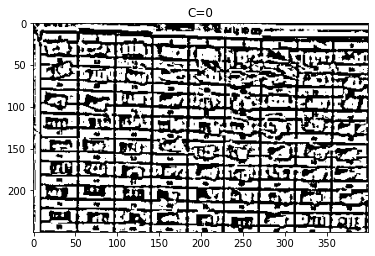

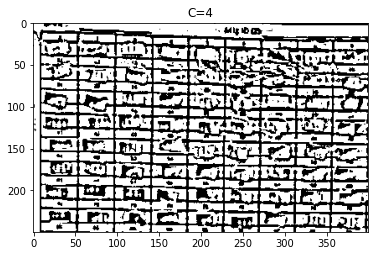

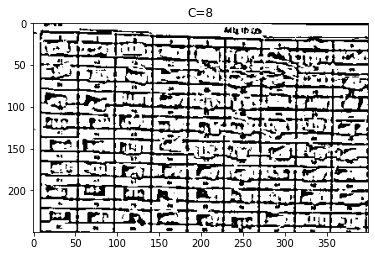

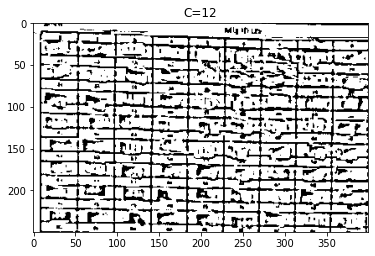

In [ ]:
# Make image gray scaled
acumenImg = temp_img.copy()
acumenImg_GRAY = cv2.cvtColor(acumenImg, cv2.COLOR_BGR2GRAY)
plt.imshow(acumenImg_GRAY, cmap="gray")
grayCropped = acumenImg_GRAY[0:250, 0:400]

# Adaptive thresholding to change into binary image
# Vary C value
# Adaptive thresh mean 
th1 = cv2.adaptiveThreshold(grayCropped, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 0)
plt.title("C=0")
plt.imshow(th1, cmap= "gray")
plt.show()

th2 = cv2.adaptiveThreshold(grayCropped, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 4)
plt.title("C=4")
plt.imshow(th2, cmap= "gray")
plt.show()

th3 = cv2.adaptiveThreshold(grayCropped, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 8)
plt.title("C=8")
plt.imshow(th3, cmap= "gray")
plt.show()

th4 = cv2.adaptiveThreshold(grayCropped, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 12)
plt.title("C=12")
plt.imshow(th4, cmap= "gray")
plt.show()



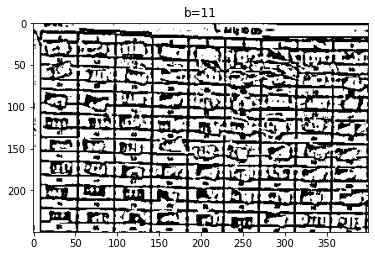

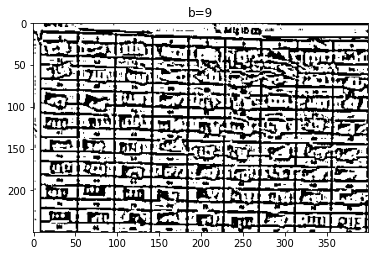

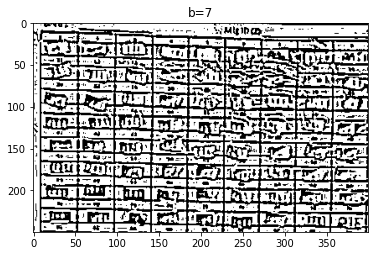

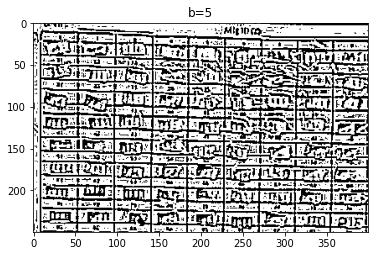

In [ ]:
# Adaptive thresholding to change into binary image
# Vary blockSize value
# Adaptive thresh mean 
th1 = cv2.adaptiveThreshold(grayCropped, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
plt.title("b=11")
plt.imshow(th1, cmap= "gray")
plt.show()

th2 = cv2.adaptiveThreshold(grayCropped, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 2)
plt.title("b=9")
plt.imshow(th2, cmap= "gray")
plt.show()

th3 = cv2.adaptiveThreshold(grayCropped, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 7, 2)
plt.title("b=7")
plt.imshow(th3, cmap= "gray")
plt.show()

th4 = cv2.adaptiveThreshold(grayCropped, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 5, 2)
plt.title("b=5")
plt.imshow(th4, cmap= "gray")
plt.show()



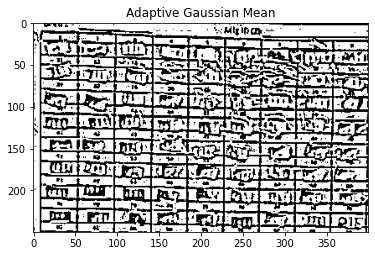

In [ ]:
# Adaptive thresh gaussian
th1 = cv2.adaptiveThreshold(grayCropped, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
plt.title("Adaptive Gaussian Mean")
plt.imshow(th1, cmap= "gray")
plt.show()

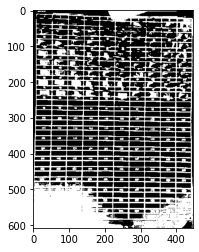

In [ ]:
# Image Simple Thresholding
ret, th = cv2.threshold(temp_image_GRAY, 140, 255, cv2.THRESH_BINARY_INV)
plt.imshow(th, cmap="gray")
plt.show()

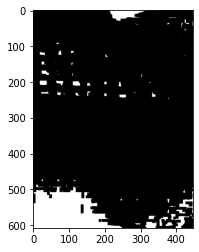

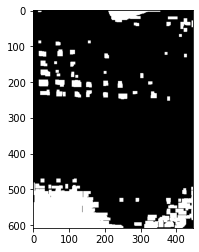

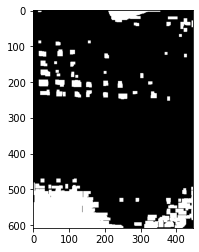

In [ ]:
# Erosion
kernel = np.ones((8,8), np.uint8)
erosion = cv2.erode(th, kernel, iterations=1)
plt.imshow(erosion, cmap="gray")
plt.show()

# Dilation
dilated = cv2.dilate(erosion, kernel, iterations=1)
plt.imshow(dilated, cmap="gray")
plt.show()

# Opening
opening = cv2.morphologyEx(th, cv2.MORPH_OPEN, kernel)
plt.imshow(opening, cmap="gray")
plt.show()

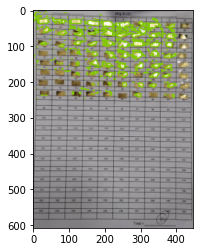

In [ ]:
# find contour
contours, hierarchy = cv2.findContours(th.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
temp_copy = temp_image_RGB.copy()

cv2.drawContours(temp_copy, contours, -1, (127, 200, 0), 2)
plt.imshow(temp_copy)
plt.show()